# [AMLD'19 Learning and Processing over Networks](https://github.com/rodrigo-pena/amld2019-graph-workshop)

# 1 Basics

In this warm-up notebook, we are going to assemble the following [Petersen graph](https://en.wikipedia.org/wiki/Cubic_graph) as a `networkx.Graph`. It might be useful to check the `networkx` [documentation](https://networkx.github.io/documentation/stable/), and in particular this [tutorial](https://networkx.github.io/documentation/stable/tutorial.html) as we go along.

![Petersen Graph](../data/petersen_graph.png)

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 1.1. Dealing with edge lists

We can start our graph as an empty object, and introduce a single node via the following command:

In [21]:
peterson_graph = nx.Graph() # Use nx.DiGraph if you want a directed graph.
peterson_graph.add_node(1)

We can also add the edge between nodes `1` and `2` by typing

In [22]:
peterson_graph.add_edge(1,2)

Another possibility is to pass a list of edges to `networkx`:

In [23]:
peterson_graph.add_edges_from([(2,3), (3,4)])

Now it is your turn. Add the remaining edges needed to construct the Peterson graph in the cell below.

In [24]:
# Your code here
edges = [
    (1, 7),
    (2, 8),
    (3, 9),
    (4, 5),
    (4, 10),
    (5, 1),
    (5, 6),
    (6, 8),
    (6, 9),
    (7, 9),
    (7, 10),
    (8, 10)
]
peterson_graph.add_edges_from(edges)

Verify that all the edges have been added by inspecting the output of the next cell.

In [25]:
[e for e in peterson_graph.edges]

[(1, 2),
 (1, 7),
 (1, 5),
 (2, 3),
 (2, 8),
 (3, 4),
 (3, 9),
 (4, 5),
 (4, 10),
 (7, 9),
 (7, 10),
 (8, 6),
 (8, 10),
 (9, 6),
 (5, 6)]

Write the graph to file as in the `edgelist` format

In [26]:
file_path = '../data/'
# Your code 
file_name = 'basics_graph.edgelist'
nx.write_edgelist(peterson_graph, file_path + file_name)


Load the `edgelist` file you have just created into a new `networkx` Graph

In [27]:
peterson_graph_from_edgelist_file = nx.read_edgelist(file_path + file_name) # Your code here

Verify that it is the same graph as before by running the cell below

In [28]:
[e for e in peterson_graph_from_edgelist_file.edges]

[('1', '2'),
 ('1', '7'),
 ('1', '5'),
 ('2', '3'),
 ('2', '8'),
 ('7', '9'),
 ('7', '10'),
 ('5', '4'),
 ('5', '6'),
 ('3', '4'),
 ('3', '9'),
 ('8', '6'),
 ('8', '10'),
 ('4', '10'),
 ('9', '6')]

## 1.2. Dealing with adjacency matrices

We are going to create the same graph again, but this time we will use `numpy` to first assemble the graph's adjacency matrix. Then, we will create a `networkx` graph from this adjacency matrix.

Use the cell below to construct the adjacency matrix of the Petersen graph we have seen on the top of the notebook. Recall that an adjacency matrix $A$ is a $(\text{# nodes}) \times (\text{# nodes})$ matrix with $A_{ij} = 1$ if and only if node $i$ is connected to node $j$ and $A_{ij} = 0$ otherwise.

In [29]:
# Your code here
array = [
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
]

adjecency = np.mat(np.array(array))

Now create a `networkx` graph from this matrix. It should be a one-line call.

In [30]:
peterson_graph_from_adjacency =  nx.from_numpy_matrix(adjecency) # Your code here

At last, verify that you have the same graph as in Section 1.1 by examining the output of the following cell. 

(Note that we had to increment the node labels by 1 because the adjacency matrix in indexed by default from 0.)

In [31]:
[(1 + e[0], 1 + e[1]) for e in peterson_graph_from_adjacency.edges]

[(1, 2),
 (1, 5),
 (1, 7),
 (2, 3),
 (2, 8),
 (3, 4),
 (3, 9),
 (4, 5),
 (4, 10),
 (5, 6),
 (6, 8),
 (6, 9),
 (7, 9),
 (7, 10),
 (8, 10)]

## 1.3 Graph visualization

The goal of this subsection is to show that the way we draw our graphs is in principle independent of the graph itself. In other words, the Euclidean distance in between points in the 2-dimensional visualizations below has nothing to do, *a priori*, with the properties of graph itsef. We will show that the same Petersen graph can have different, but equally correct representations on the 2d plane.

First, look into the `networkx` documentation about how to draw a **circular** layout for a given graph. Then, use the cell below to plot the Petersen graph using such a layout. *Hint:* set the parameter `with_labels=True` when drawing the graph, so you know which node is which.

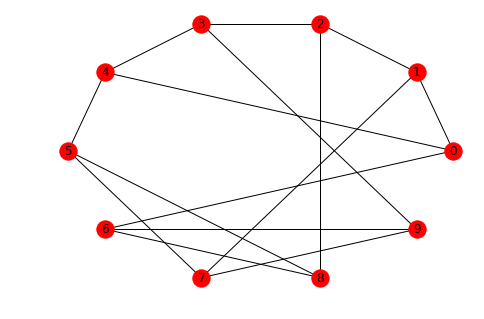

In [32]:
nx.draw_circular(peterson_graph_from_adjacency, with_labels=True)
plt.show()

Now, draw the Petersen graph using a **spring** layout. Does it look more like the first image we have seen of it? Try re-running the cell a couple of times.

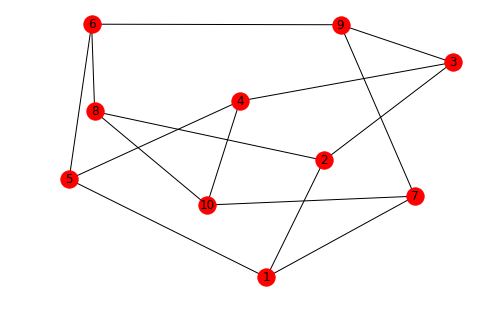

In [36]:
nx.draw_spring(peterson_graph_from_edgelist_file, with_labels=True)
plt.show()

You can use the cell below to experiment with other `networkx` (or otherwise) layouts.

Finally, in case you are wondering whether we can reproduce the original drawing of the graph, run the cell below. Try to examine the documentation to discover how this was made possible.

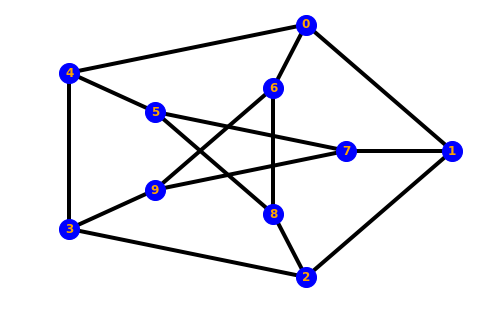

In [39]:
options = { 
     'node_color': 'blue',
     'node_size': 400,
     'width': 4,
     'with_labels': True,
     'font_color': 'orange',
     'font_weight': 'bold'
}
shells = [[7, 6, 5, 9, 8], [1, 0, 4, 3, 2]]
nx.draw_shell(peterson_graph_from_adjacency, nlist=shells, **options)